# Import Required Libraries
Import TensorFlow, Keras, urllib.request, zipfile, os, and matplotlib for building and training the classifier.

In [1]:
# Import necessary libraries for building and training the classifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt

# Download Dataset with Custom Headers
Use urllib.request with a User-Agent header to download the cats_and_dogs_filtered.zip dataset from Google Cloud Storage to avoid 403 errors.

In [3]:
import os
import zipfile
import urllib.request

# 1. Use the working MLCC mirror link
url = "https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip"
file_name = "cats_and_dogs_filtered.zip"

# 2. Download
print(f"Downloading from {url}...")
urllib.request.urlretrieve(url, file_name)

# 3. Extract
print("Extracting...")
with zipfile.ZipFile(file_name, "r") as zip_ref:
    zip_ref.extractall(".")

print("Done! Data is ready.")

Extracting...
Done! Data is ready.


# Extract Dataset
Use the zipfile library to extract the downloaded ZIP file into the current directory.

In [4]:
# Extract the dataset using zipfile
with zipfile.ZipFile(file_name, "r") as zip_ref:
    zip_ref.extractall(".")  # Extract to the current directory

# Verify extraction
dataset_dir = "cats_and_dogs_filtered"
if os.path.exists(dataset_dir):
    print(f"Dataset successfully downloaded and extracted to '{dataset_dir}'")
else:
    print("Dataset extraction failed.")

Dataset successfully downloaded and extracted to 'cats_and_dogs_filtered'


# Set Up Data Directories
Define paths to the training and validation directories for cats and dogs images.

In [6]:
import os

# Base directory - should be at the root level
base_dir = 'cats_and_dogs_filtered'

# Training directories
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Validation directories
validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Verify directories exist
print("Training cats directory:", train_cats_dir, "- Exists:", os.path.exists(train_cats_dir))
print("Training dogs directory:", train_dogs_dir, "- Exists:", os.path.exists(train_dogs_dir))
print("Validation cats directory:", validation_cats_dir, "- Exists:", os.path.exists(validation_cats_dir))
print("Validation dogs directory:", validation_dogs_dir, "- Exists:", os.path.exists(validation_dogs_dir))

# Count files in each directory
print(f"\nTotal training cat images: {len(os.listdir(train_cats_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dogs_dir))}")
print(f"Total validation cat images: {len(os.listdir(validation_cats_dir))}")
print(f"Total validation dog images: {len(os.listdir(validation_dogs_dir))}")

Training cats directory: cats_and_dogs_filtered\train\cats - Exists: True
Training dogs directory: cats_and_dogs_filtered\train\dogs - Exists: True
Validation cats directory: cats_and_dogs_filtered\validation\cats - Exists: True
Validation dogs directory: cats_and_dogs_filtered\validation\dogs - Exists: True

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


# Create Data Generators
Create ImageDataGenerator objects with pixel normalization (rescale=1./255) and data augmentation (rotation_range=40, horizontal_flip=True) for training, and only normalization for validation. Use flow_from_directory with target_size=(150, 150), batch_size=32, and class_mode='binary'.

In [7]:
# Create ImageDataGenerator objects for training and validation

# Create a training data generator with normalization and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    horizontal_flip=True  # Randomly flip images horizontally
)

# Create a validation data generator with only normalization
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
)

# Create training data generator from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the training data directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Number of images per batch
    class_mode='binary'  # Binary classification (cats vs. dogs)
)

# Create validation data generator from the directory
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # Path to the validation data directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Number of images per batch
    class_mode='binary'  # Binary classification (cats vs. dogs)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Build the CNN Model
Build a Sequential model with three Conv2D layers (32, 64, 128 filters) each followed by MaxPooling2D(2,2), then Flatten, Dense(512, activation='relu'), and Dense(1, activation='sigmoid').

In [8]:
# Build the CNN Model
model = keras.Sequential([
    # First convolutional layer with 32 filters and MaxPooling
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    
    # Second convolutional layer with 64 filters and MaxPooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    # Third convolutional layer with 128 filters and MaxPooling
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the feature maps
    keras.layers.Flatten(),
    
    # Dense hidden layer with 512 units and ReLU activation
    keras.layers.Dense(512, activation='relu'),
    
    # Output layer with 1 unit and Sigmoid activation for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Display the model summary
model.summary()

c:\Users\eesha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model
Compile the model using the Adam optimizer, binary_crossentropy loss, and accuracy as the metric.

In [9]:
# Compile the model using Adam optimizer, binary_crossentropy loss, and accuracy as the metric
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Train the Model
Train the model for 10-15 epochs using the fit method with training and validation generators, and store the training history.

In [10]:
# Train the model for 10-15 epochs using the fit method with training and validation generators
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_generator),  # Number of steps per epoch
    epochs=15,  # Train for 15 epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=len(validation_generator)  # Number of validation steps
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5020 - loss: 0.7495 - val_accuracy: 0.5080 - val_loss: 0.6791
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5790 - loss: 0.6678 - val_accuracy: 0.6320 - val_loss: 0.6287
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6095 - loss: 0.6631 - val_accuracy: 0.5980 - val_loss: 0.6623
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6410 - loss: 0.6418 - val_accuracy: 0.6260 - val_loss: 0.6526
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6650 - loss: 0.6312 - val_accuracy: 0.6340 - val_loss: 0.6628
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 983ms/step - accuracy: 0.6820 - loss: 0.5955 - val_accuracy: 0.6580 - val_loss: 0.6133
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6835 - loss: 0.5940 - val_accuracy: 0.6920 - val_loss: 0.5825
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 996ms/step - accuracy: 0.7080 - loss: 0.5778 - val_accuracy: 0.6780 - val

# Plot Training History
Use matplotlib to create plots showing Training vs. Validation Accuracy and Training vs. Validation Loss across epochs.

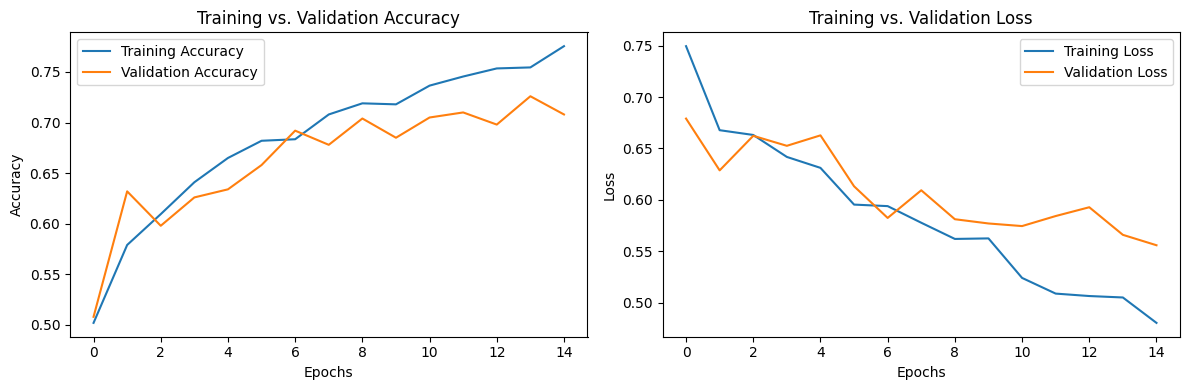

In [11]:
# Plot Training vs. Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

# Plot Training vs. Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training vs. Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

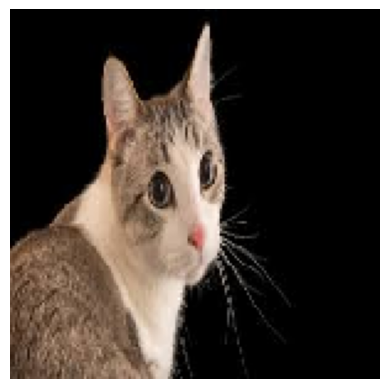

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Raw Prediction Value: 0.4394

🐱 It's a CAT!


In [12]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# 1. CHANGE THIS to the name of your image file
path = 'test_image.jpg' 

try:
    # 2. Preprocess the image (Must match training: 150x150)
    img = load_img(path, target_size=(150, 150))
    
    # Display the image so you know what you're predicting
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert to Array & Rescale (Divide by 255 just like training!)
    x = img_to_array(img)
    x = x / 255.0  
    
    # Add a "Batch" dimension (Model expects (Batch, Height, Width, Color))
    # Shape becomes (1, 150, 150, 3)
    x = np.expand_dims(x, axis=0)

    # 3. Predict
    # returns a probability (0 to 1) because of Sigmoid
    prediction = model.predict(x) 
    
    print(f"Raw Prediction Value: {prediction[0][0]:.4f}")

    # 4. Interpret Result
    if prediction[0][0] > 0.5:
        print("\n🐶 It's a DOG!")
    else:
        print("\n🐱 It's a CAT!")

except Exception as e:
    print(f"Error: Could not process image. Make sure '{path}' exists.")
    print(e)